In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp /content/gdrive/MyDrive/git_projects/plastic_extruder/plastic_extruder/extrusion.csv /content/

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv ('extrusion.csv')
df

,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
0,25.06.2018 4:40,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,78.0,0.0,50.0,5.0,15.0,53.0
1,25.06.2018 4:42,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,49.0
2,25.06.2018 4:45,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,48.0
3,25.06.2018 4:47,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,50.0
4,25.06.2018 4:49,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,25.06.2019 6:36,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0
226532,25.06.2019 6:38,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0
226533,25.06.2019 6:40,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0
226534,25.06.2019 6:42,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226536 entries, 0 to 226535
Columns: 470 entries, Datum to ST114_VARWdTensVis
dtypes: float64(469), object(1)
memory usage: 812.3+ MB


In [6]:
df.describe()

,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
count,226536.0,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,...,225435.000000,2.254350e+05,225435.000000,225435.000000,225435.000000,225435.0,225435.000000,225435.0,225435.0,225435.00000
mean,0.0,3.033558,176.069761,1.0,184.111399,0.565540,176.237815,1.0,176.359344,11.219849,...,21.104620,1.127531e+06,709.736514,0.793998,57.329057,0.0,69.033584,5.0,15.0,57.27753
std,0.0,7.461482,16.550270,0.0,21.348341,3.585595,16.569598,0.0,20.954396,9.545225,...,0.306064,1.409486e+06,920.508457,0.404433,32.022970,0.0,23.117881,0.0,0.0,31.43569
min,0.0,0.000000,100.000000,1.0,14.000000,0.000000,100.000000,1.0,10.000000,0.000000,...,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,40.000000,5.0,15.0,-4.00000
25%,0.0,0.000000,172.000000,1.0,180.000000,0.000000,172.000000,1.0,173.000000,3.000000,...,21.000000,1.691720e+05,102.000000,1.000000,31.000000,0.0,55.000000,5.0,15.0,49.00000
50%,0.0,0.000000,178.000000,1.0,186.000000,0.000000,178.000000,1.0,180.000000,11.000000,...,21.000000,5.182820e+05,291.000000,1.000000,73.000000,0.0,60.000000,5.0,15.0,58.00000
75%,0.0,3.000000,180.000000,1.0,191.000000,0.000000,182.000000,1.0,185.000000,17.000000,...,21.000000,1.404420e+06,889.000000,1.000000,83.000000,0.0,75.000000,5.0,15.0,67.00000
max,0.0,100.000000,250.000000,1.0,253.000000,100.000000,250.000000,1.0,254.000000,100.000000,...,22.000000,5.898309e+06,3860.000000,1.000000,100.000000,0.0,230.000000,5.0,15.0,302.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53f4108d10>,
      dtype=object)

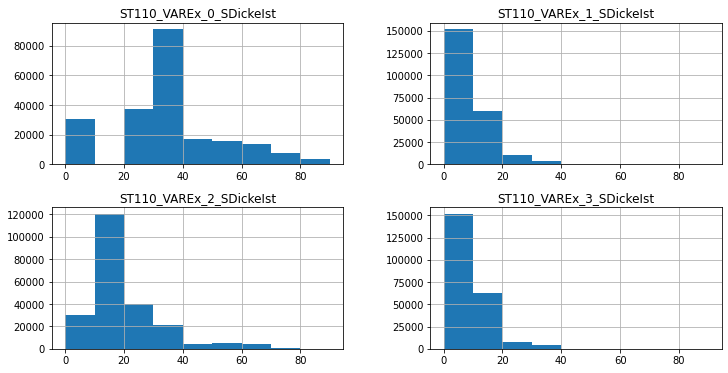

In [8]:
# plot histogram of thickness 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
df.hist(column=["ST110_VAREx_0_SDickeIst", "ST110_VAREx_1_SDickeIst", "ST110_VAREx_2_SDickeIst", "ST110_VAREx_3_SDickeIst"], bins=range(0, 100,10))

In [9]:
df['ST110_VAREx_1_SDickeIst']

0         5.7
1         5.8
2         5.8
3         5.8
4         5.8
         ... 
226531    9.7
226532    9.7
226533    9.7
226534    9.7
226535    9.8
Name: ST110_VAREx_1_SDickeIst, Length: 226536, dtype: float64

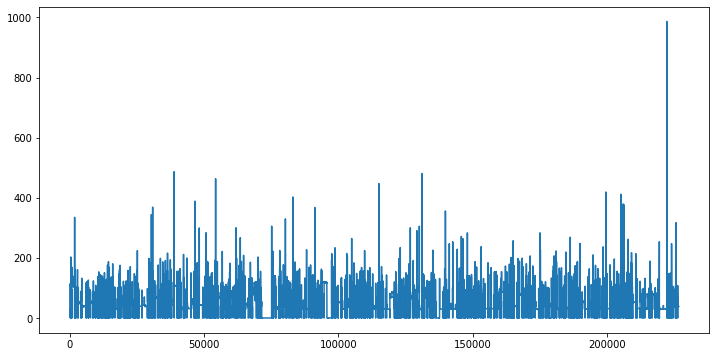

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['ST110_VAREx_0_SDickeIst'])